# Hello World _in markdown_

In [1]:
def foo(bar):
    """This is a super helpful docstring!!"""
    return bar


foo('Hello')

'Hello'

In [2]:
# foo?  # Helpful for not having to go dig up the docs!

# Below will be Seattle Weather Analysis - 1948-2017

In [3]:
import pandas as pd
import numpy as np
# from numpy import *  This is a huge NO-NO
import datetime as dt

In [4]:
df = pd.read_csv('./seattle_weather.csv')

In [5]:
df.head(2)

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True


In [6]:
df.tail(2)

,DATE,PRCP,TMAX,TMIN,RAIN
25549,2017-12-13,0.0,48,34,False
25550,2017-12-14,0.0,50,36,False


In [7]:
df.sample(2)

,DATE,PRCP,TMAX,TMIN,RAIN
12532,1982-04-24,0.0,56,40,False
14539,1987-10-22,0.0,57,40,False


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
DATE    25551 non-null object
PRCP    25548 non-null float64
TMAX    25551 non-null int64
TMIN    25551 non-null int64
RAIN    25548 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 998.2+ KB


In [9]:
df.describe()

,PRCP,TMAX,TMIN
count,25548.000000,25551.000000,25551.000000
mean,0.106222,59.544206,44.514226
std,0.239031,12.772984,8.892836
min,0.000000,4.000000,0.000000
25%,0.000000,50.000000,38.000000
50%,0.000000,58.000000,45.000000
75%,0.100000,69.000000,52.000000
max,5.020000,103.000000,71.000000


**Add Datetime Info and swap Booleans to 1/0 values**

In [10]:
# def bool_swap(num):
#     if num == 'False':
#         num = 0
#         return
#     num = 1

df.RAIN = df.RAIN.apply(lambda x: 1 if x else 0)

In [11]:
df.DATE = pd.to_datetime(df.DATE)

In [12]:
df['DAY'] = df.DATE.apply(dt.datetime.isoweekday)
df['DAY_OF_WEEK'] = df.DATE.dt.weekday_name
df['MONTH'] = df.DATE.dt.month
df['YEAR'] = df.DATE.dt.year

### How many days in total has it rained vs not?

In [13]:
rained = df.RAIN.groupby(df.RAIN)

In [23]:
series = rained.count()
series

RAIN
0    14648
1    10903
Name: RAIN, dtype: int64

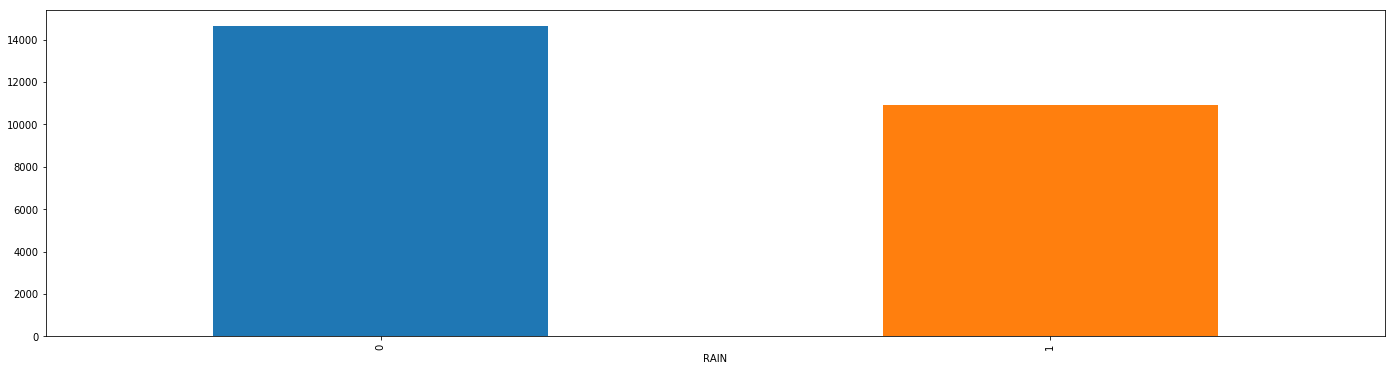

In [25]:
series.plot(kind='bar', figsize=(24.0, 6.0))

In [15]:
avg_rain = series.loc[0] / df.RAIN.count()
print(f'The average percent of not rain in Seattle is {avg_rain}')

The average percent of not rain in Seattle is 0.5732848029431333


In [16]:
df.sample(5)

,DATE,PRCP,TMAX,TMIN,RAIN,DAY,DAY_OF_WEEK,MONTH,YEAR
18335,1998-03-14,0.00,56,44,0,6,Saturday,3,1998
14883,1988-09-30,0.00,74,54,0,5,Friday,9,1988
23658,2012-10-09,0.00,61,48,0,2,Tuesday,10,2012
18944,1999-11-13,0.29,52,45,1,6,Saturday,11,1999
14976,1989-01-01,0.04,44,39,1,7,Sunday,1,1989


In [17]:
df[df.YEAR == 2017].head()

,DATE,PRCP,TMAX,TMIN,RAIN,DAY,DAY_OF_WEEK,MONTH,YEAR
25203,2017-01-01,0.43,37,28,1,7,Sunday,1,2017
25204,2017-01-02,0.00,34,26,0,1,Monday,1,2017
25205,2017-01-03,0.00,33,21,0,2,Tuesday,1,2017
25206,2017-01-04,0.00,36,22,0,3,Wednesday,1,2017
25207,2017-01-05,0.00,35,21,0,4,Thursday,1,2017


In [18]:
df[df.TMAX.isna() == True]

,DATE,PRCP,TMAX,TMIN,RAIN,DAY,DAY_OF_WEEK,MONTH,YEAR


### What's the average temperature on days which have no rain?
- Filter for days with no rain
- Find average temp
- Present


In [19]:
rainless_df = df[df.RAIN == False].copy()

In [20]:
rainless_df['TAVG'] = (rainless_df.TMAX + rainless_df.TMIN) // 2

In [21]:
rainless_df.TAVG[rainless_df.YEAR == 1948].mean()

51.06878306878307

In [22]:
rainless_df.sample(5)

,DATE,PRCP,TMAX,TMIN,RAIN,DAY,DAY_OF_WEEK,MONTH,YEAR,TAVG
13938,1986-02-28,0.0,60,45,0,5,Friday,2,1986,52
10963,1978-01-06,0.0,42,38,0,5,Friday,1,1978,40
20580,2004-05-06,0.0,66,45,0,4,Thursday,5,2004,55
18335,1998-03-14,0.0,56,44,0,6,Saturday,3,1998,50
11571,1979-09-06,0.0,70,55,0,4,Thursday,9,1979,62


# Lets make some pretty pictures!!

In [28]:
rainy_days = df[df.RAIN == True].groupby(df.DAY_OF_WEEK)
rainy_days['DAY_OF_WEEK'].count()

DAY_OF_WEEK
Friday       1559
Monday       1569
Saturday     1584
Sunday       1564
Thursday     1552
Tuesday      1562
Wednesday    1513
Name: DAY_OF_WEEK, dtype: int64

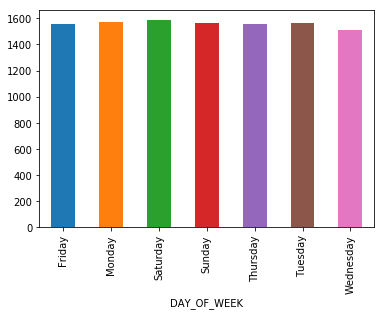

In [29]:
rainy_days['DAY_OF_WEEK'].count().plot(kind='bar')

In [30]:
rainy_months = df[df.RAIN == True].groupby(df.MONTH)

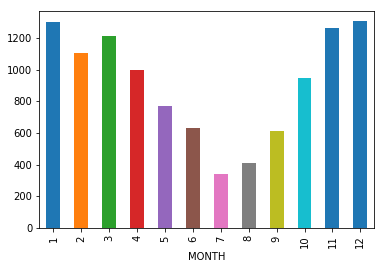

In [32]:
rainy_months.MONTH.count().plot(kind='bar')

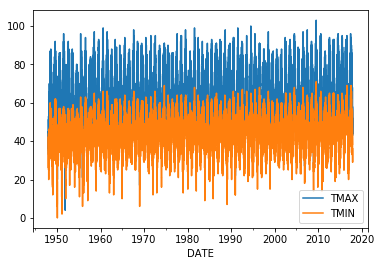

In [34]:
df.plot(x='DATE', y=['TMAX', 'TMIN'])

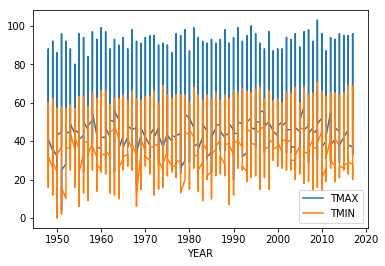

In [37]:
df.plot(x='YEAR', y=['TMAX', 'TMIN'])

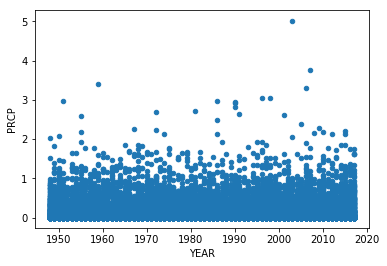

In [40]:
df.plot(x='YEAR', y='PRCP', kind='scatter')

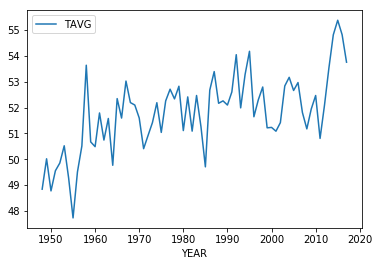

In [44]:
df['TAVG'] = (df.TMAX + df.TMIN) // 2
df[['YEAR', 'TAVG']].groupby('YEAR').mean().plot()

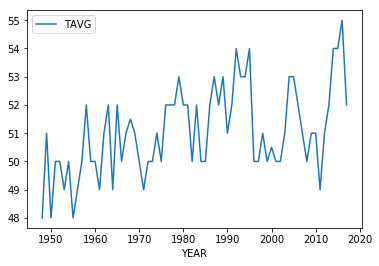

In [45]:
df[['YEAR', 'TAVG']].groupby('YEAR').median().plot()